In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

<<<< Задача 3 >>>>

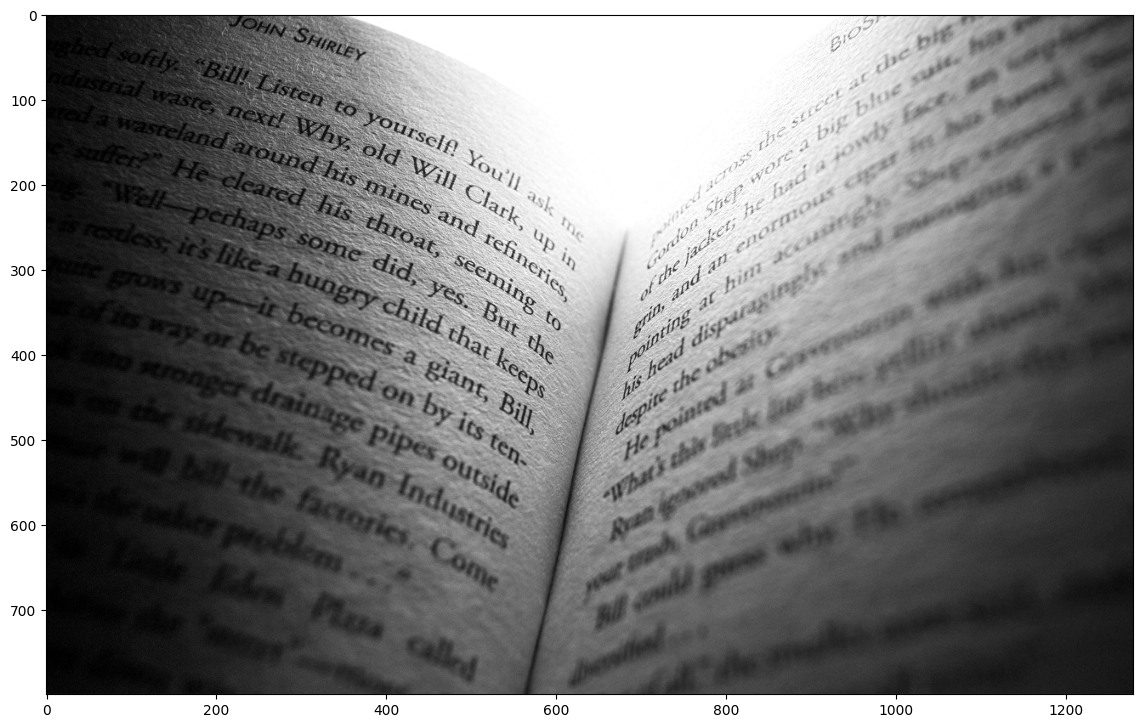

In [2]:
gray_img = np.array(Image.open(r"book_page.jpg"))[:, :, 0]
plt.figure(figsize=(16, 9), dpi=100)
plt.imshow(gray_img, cmap='gray')

In [3]:
thresh1 = cv2.adaptiveThreshold(gray_img, 100, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 181, 4)
thresh2 = cv2.adaptiveThreshold(gray_img, 100, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 181, 5)

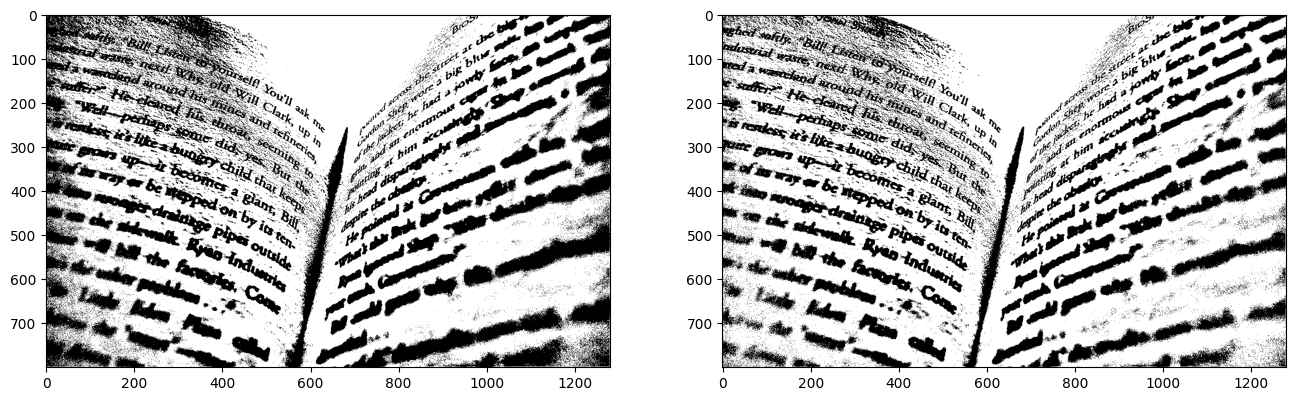

In [4]:
plt.figure(figsize=(16, 9), dpi=100)
plt.subplot(1, 2, 1)
plt.imshow(thresh1, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(thresh2, cmap='gray')

<<<< Задача 4 >>>>

In [22]:
def gamma_correction(src, gamma):

        if gamma == 10 or gamma == 0:
            return src

        invGamma = 1 / (gamma / 10)

        table = [((i / 255) ** invGamma) * 255 for i in range(256)]
        table = np.array(table, np.uint8)
    
        return cv2.LUT(src, table)

def apply_brightness_contrast(input_img, brightness = 0, contrast = 0):
    contrast = contrast / 10.0

    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        
        alpha_b = (highlight - shadow) / 255
        gamma_b = shadow
        
        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()
    
    if contrast != 0:
        f = float(131*(contrast + 127))/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1 - f)
        
        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf

class BrightnessCorrectionUnit:
    
    def __init__(self, window_name) -> None:
        self.img = cv2.imread(r'book_page.jpg')
        self.window_name = window_name
        self.alpha: float = 0.0
        self.beta: float = 0.0
        self.gamma: float = 0.0
    
    def on_change_alpha(self, value):
        brightness_correction.alpha = value
        corrected = apply_brightness_contrast(self.img, self.beta, self.alpha)
        cv2.imshow(self.window_name, corrected)

    def on_change_beta(self, value):
        brightness_correction.beta = value
        corrected = apply_brightness_contrast(self.img, self.beta, self.alpha)
        cv2.imshow(self.window_name, corrected)

    def on_change_gamma(self, value):
        brightness_correction.gamma = value
        corrected = gamma_correction(self.img, self.gamma)
        cv2.imshow(self.window_name, corrected)



brightness_correction = BrightnessCorrectionUnit('image')

cv2.namedWindow(brightness_correction.window_name, cv2.WINDOW_NORMAL)
cv2.resizeWindow(brightness_correction.window_name, 1280, 900) 
cv2.imshow(brightness_correction.window_name, brightness_correction.img)

cv2.createTrackbar('Gamma', brightness_correction.window_name, 1, 100, brightness_correction.on_change_gamma)
cv2.createTrackbar('Beta', brightness_correction.window_name, 0, 127, brightness_correction.on_change_beta)
cv2.createTrackbar('Alpha', brightness_correction.window_name, 1, 100, brightness_correction.on_change_alpha)

 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [54]:
img = cv2.imread('lenna.png', 0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

In [55]:
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf_cool = np.ma.filled(cdf_m, 0).astype('uint8')
img2 = cdf_cool[img]

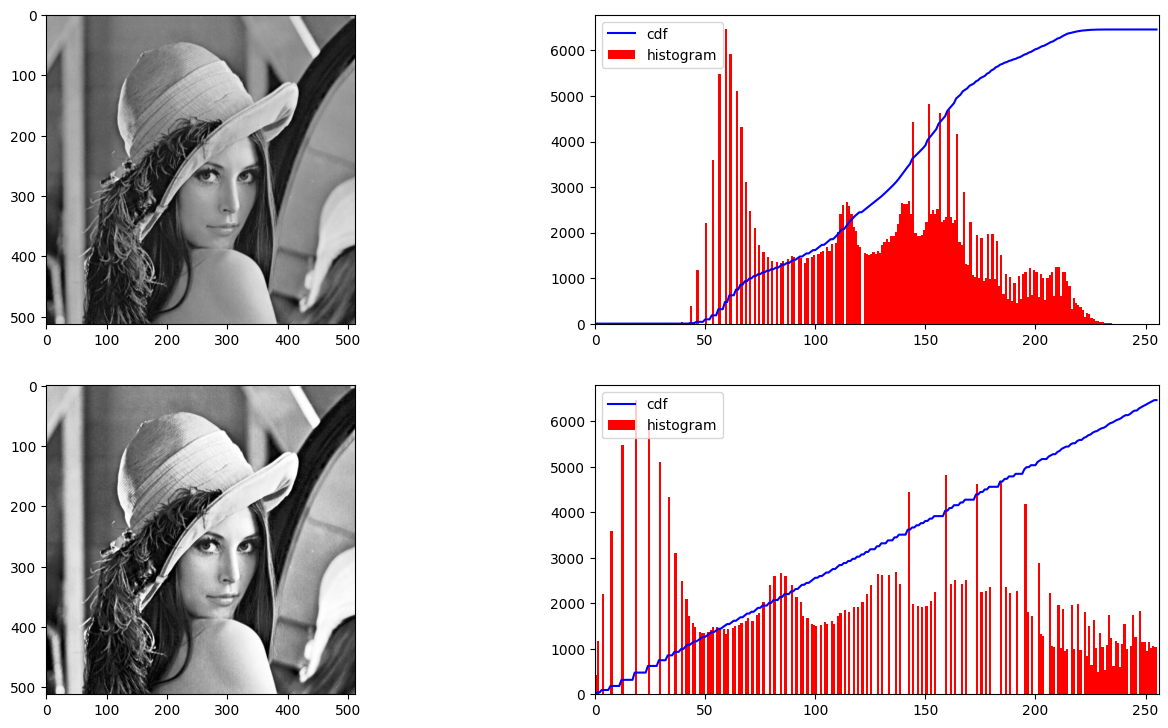

In [56]:
hist_cool, bins_cool = np.histogram(img2.flatten(),256,[0,256])
cdf_cool = hist_cool.cumsum()
cdf_normalized_cool = cdf_cool * float(hist_cool.max()) / cdf_cool.max()

plt.figure(figsize=(16, 9), dpi=100)

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(2, 2, 2)
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.legend(('cdf','histogram'), loc = 'upper left')

plt.subplot(2, 2, 3)
plt.imshow(img2, cmap='gray')
plt.subplot(2, 2, 4)
plt.plot(cdf_normalized_cool, color = 'b')
plt.hist(img2.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')

plt.show()

<<< Задание 5>>>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [5]:
img = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)


N = 15
image_list = []

for i in range(N):
    image_list.append(img + np.random.randint(-50, 50, size=img.shape))


result_image = np.array(sum(image_list) / N, dtype=np.uint8)
noised_image =  np.array(image_list[0], dtype=np.uint8)

noise_result_pair_image = np.hstack((img, result_image, noised_image))
print(noise_result_pair_image.shape)

win_name = 'Comparasion with N = ' + str(N)
height = noise_result_pair_image.shape[0]
lenght = noise_result_pair_image.shape[1]

cv2.namedWindow(win_name, cv2.WINDOW_NORMAL)
cv2.resizeWindow(win_name, lenght, height) 
cv2.imshow(win_name, noise_result_pair_image)
cv2.waitKey(0)

(512, 1536)


-1